<p style='font-size:20px'>Taller 2 Regresión Lineal</p>

<p>Presentado por: Andrés Mauricio Martinez Celis</p>
<p>Contexto: Apoyo del banco mundial a paises de desarrollo</p>

# Analisis de datos:

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import json
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
countries = pd.read_csv("./Archivos/gapminder_final.csv", sep=",")

In [3]:
countries.shape

(178, 16)

In [4]:
countries.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
59,Ghana,358.979540,3.11,0.131487,28.1,1.882687e+08,64.099998,1.8,9.549931,64.228,NaN,8.0,97.246492,6.288555,65.099998,50.02
110,France,22878.466570,12.48,1.233780,91.9,3.334163e+10,45.599998,0.4,77.498619,81.539,1.328291,9.0,2539.753273,14.091530,51.200001,77.36
73,Germany,25306.187190,12.14,0.575810,79.8,4.122955e+10,46.799999,0.1,82.526898,80.414,1.398500,10.0,1693.891898,9.211085,53.500000,73.64
83,Burkina Faso,276.200413,7.32,0.162904,30.6,2.062867e+07,75.800003,1.2,1.400061,55.439,NaN,0.0,NaN,8.204222,81.300003,19.56
14,Mali,269.892881,0.99,0.326978,18.2,1.751567e+07,34.400002,1.0,2.699966,51.444,NaN,7.0,NaN,8.262893,45.700001,32.18


In [5]:
countries["country"].unique()

array(['Ireland', 'Albania', 'Central African Rep.', 'Barbados', 'Italy',
       'Switzerland', 'Mauritania', 'Oman', 'Tanzania', 'Thailand',
       'Haiti', 'Equatorial Guinea', 'Guatemala', 'Iraq', 'Mali',
       'Bolivia', 'Kenya', 'Panama', 'Macedonia, FYR', 'Austria', 'Fiji',
       'Cuba', 'Azerbaijan', 'Korea, Rep.', 'Nicaragua', 'Lithuania',
       'Saudi Arabia', 'Belarus', 'Lesotho', 'Cape Verde', 'Eritrea',
       'Uganda', 'South Africa', 'Gabon', 'Georgia', 'Estonia',
       'Argentina', 'Cambodia', 'Suriname', 'Gambia', 'Japan',
       'Mozambique', 'Norway', 'Angola', 'Yemen, Rep.', 'Armenia',
       'Costa Rica', 'Turkey', 'Moldova', 'Pakistan', 'Vietnam', 'Spain',
       'Syria', 'Uzbekistan', 'Swaziland', 'Croatia', 'Solomon Islands',
       'Ghana', 'Finland', 'Senegal', 'Bangladesh', 'Guyana', 'Ethiopia',
       'Russia', 'Israel', 'Malaysia', 'Kuwait', 'Malta', 'Ecuador',
       'Mongolia', 'Kyrgyzstan', 'Germany', 'Rwanda', 'China', 'Burundi',
       'Slovak Repub

Revisión de datos duplicados, se bsuca algun pais duplicado ya que dos paises en el mismo dataset es peligroso para el modelos, por ende un registro para un pais es suficiente.

In [6]:
countries[countries.duplicated('country')]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
32,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
39,Oman,11191.811010,0.92,4.465998,13.2,4.879930e+08,22.600000,0.1,61.987413,72.974,NaN,-8.0,2124.608816,3.716739,50.700001,71.62
74,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90
111,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
120,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.5,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36
124,Iran,2161.546510,1.03,2.026400,17.1,9.183548e+09,26.900000,0.2,13.000111,72.974,1.162576,-7.0,753.209802,6.021882,47.799999,68.46
143,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96
148,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.3,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46
149,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
155,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34


In [7]:
#se eliminan los duplicados
countries = countries.drop_duplicates(subset=['country'])

<p style='color: red'>Se eliminan los duplicados, se encuentran 12 duplicados, quedan 166 paises</p>

In [8]:
countries[countries.duplicated('country')]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate


In [9]:
countries.shape

(166, 16)

In [10]:
features=["hivrate", "polityscore", "armedforcesrate", "internetuserate", "incomeperperson", "co2emissions","femaleemployrate","employrate","alcconsumption","lifeexpectancy","urbanrate","suicideper100th",'relectricperperson','breastcancerper100th']

In [11]:
# Mostrar porcentaje de valores nulos en columnas
percentage_result = countries.isnull().sum()/countries.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "NullsPercentage": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result= percentage_result.sort_values(by='NullsPercentage', ascending=False)
percentage_result

,columns,NullsPercentage
10,oilperperson,63.253012
12,relectricperperson,21.686747
7,hivrate,13.253012
11,polityscore,6.024096
3,armedforcesrate,2.409639
1,incomeperperson,1.807229
8,internetuserate,1.807229
5,co2emissions,1.204819
4,breastcancerper100th,0.602410
6,femaleemployrate,0.602410


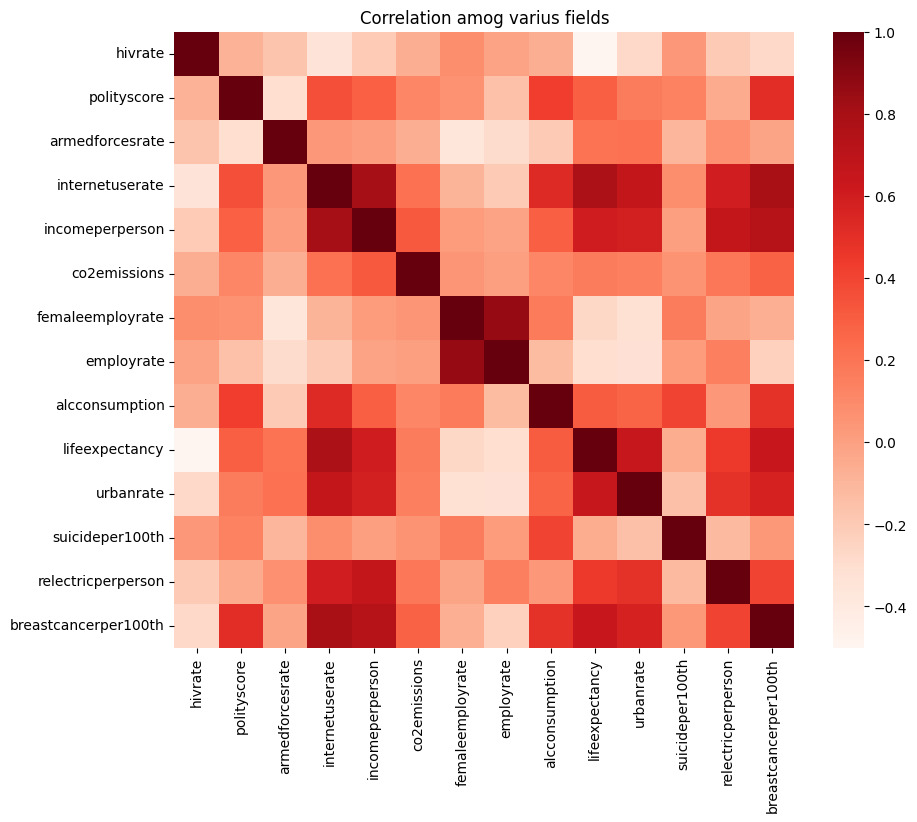

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    countries[features].corr(),
    vmin=-0.5, vmax=1,
    cmap="Reds"
)
plt.title("Correlation amog varius fields")
plt.show()

In [13]:
countries[features].corr()

,hivrate,polityscore,armedforcesrate,internetuserate,incomeperperson,co2emissions,femaleemployrate,employrate,alcconsumption,lifeexpectancy,urbanrate,suicideper100th,relectricperperson,breastcancerper100th
hivrate,1.000000,-0.081699,-0.168651,-0.343845,-0.201640,-0.064898,0.090845,-0.011101,-0.062769,-0.574164,-0.274755,0.037508,-0.198288,-0.273975
polityscore,-0.081699,1.000000,-0.304818,0.360971,0.287579,0.116393,0.063134,-0.149022,0.426370,0.293101,0.166196,0.136173,-0.049553,0.510966
armedforcesrate,-0.168651,-0.304818,1.000000,0.037379,0.015255,-0.061345,-0.360188,-0.290405,-0.196560,0.207118,0.218402,-0.095980,0.069764,-0.018761
internetuserate,-0.343845,0.360971,0.037379,1.000000,0.808128,0.216852,-0.095331,-0.199687,0.527681,0.772903,0.667022,0.081034,0.596304,0.790571
incomeperperson,-0.201640,0.287579,0.015255,0.808128,1.000000,0.316875,0.019218,-0.011747,0.291129,0.606281,0.585350,0.005159,0.664379,0.730466
co2emissions,-0.064898,0.116393,-0.061345,0.216852,0.316875,1.000000,0.049419,0.008849,0.117227,0.167545,0.151257,0.058188,0.187882,0.284341
femaleemployrate,0.090845,0.063134,-0.360188,-0.095331,0.019218,0.049419,1.000000,0.856607,0.171937,-0.270052,-0.315862,0.163434,-0.017288,-0.067083
employrate,-0.011101,-0.149022,-0.290405,-0.199687,-0.011747,0.008849,0.856607,1.000000,-0.129719,-0.304033,-0.322227,0.016203,0.149464,-0.232849
alcconsumption,-0.062769,0.426370,-0.196560,0.527681,0.291129,0.117227,0.171937,-0.129719,1.000000,0.304747,0.276193,0.405118,0.034613,0.489040
lifeexpectancy,-0.574164,0.293101,0.207118,0.772903,0.606281,0.167545,-0.270052,-0.304033,0.304747,1.000000,0.650418,-0.058556,0.447857,0.638523


<h3> Agregar valor al analisis al valor univariado:</h3>
Para tener mas datos de un pais usamos un json que tiene informacion geografica del pais para determinar regiones y otro datos utiles para el analisis

In [14]:
country_info = {}
with open('./Archivos/countries.json', 'r', encoding='utf-8') as file:
    countries_data = json.load(file)

for country_data in countries_data:
    nombre_pais = country_data["name"]["common"]
    region = country_data.get("region", "")
    subregion = country_data.get("subregion", "") 
    info_interna = {"region": region, "subregion": subregion}
    country_info[nombre_pais] = info_interna

In [15]:
def obtener_region_subregion(pais):
    info = country_info.get(pais, {})  # Obtener información del diccionario
    return info.get("region", ""), info.get("subregion", "")  # Devolver región y subregión

In [16]:
obtener_region_subregion("Netherlands")

('Europe', 'Western Europe')

In [17]:
#Se crean las columnas categoricas región y subregion (solo uso imputacion y discriminacion)
# Aplica la función para crear nuevas columnas 'region' y 'subregion'
countries[["region", "subregion"]] = countries["country"].apply(obtener_region_subregion).apply(pd.Series)

In [18]:
countries.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region,subregion
101,Egypt,1975.551906,0.32,3.290807,24.2,3.341129e+09,18.200001,0.06,26.740025,73.235,0.447479,-3.0,536.760451,1.799904,42.400002,42.72,Africa,Northern Africa
93,Madagascar,242.677534,1.32,0.235185,19.5,6.277700e+07,79.199997,0.20,1.699985,66.718,NaN,0.0,NaN,5.767406,83.000000,29.52,Africa,Eastern Africa
67,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.50,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36,Asia,South-Eastern Asia
79,Bahamas,19630.540550,8.65,0.545286,54.4,1.375550e+08,60.700001,3.10,42.984580,75.620,NaN,NaN,NaN,3.374416,66.599998,83.70,Americas,Caribbean
40,Suriname,2668.020519,6.56,1.058419,30.0,8.631700e+07,30.400000,1.00,31.568098,70.563,NaN,NaN,NaN,20.747431,44.700001,74.92,Americas,South America


In [19]:
#Algunas quedan vacias se buscan e imputan manualmente
filtrosRegsionVacia=countries[countries['region'] == '']
filtrosRegsionVacia

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region,subregion
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.70,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,,
18,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90,,
23,"Korea, Rep.",16372.499780,19.15,2.833966,20.4,9.666892e+09,48.000000,0.06,82.515928,80.642,2.087848,8.0,1142.309009,22.404560,58.900002,81.46,,
46,"Yemen, Rep.",610.357367,0.20,2.316235,35.1,2.348647e+08,20.299999,NaN,12.349750,65.493,NaN,-2.0,130.057831,6.265789,39.000000,30.64,,
56,Swaziland,1810.230533,5.05,NaN,12.3,2.270400e+07,47.099998,25.90,9.007736,48.718,NaN,-9.0,NaN,12.872222,50.900002,24.94,,
78,Slovak Republic,8445.526689,13.31,0.628578,48.0,5.906743e+08,45.299999,0.06,79.889777,75.446,0.677393,10.0,830.701647,10.645740,53.400002,56.56,,
92,"Congo, Dem. Rep.",103.775857,3.39,0.628381,10.3,1.691800e+08,50.400002,NaN,0.720009,48.397,NaN,5.0,30.709244,14.713020,66.199997,33.96,,
106,"Congo, Rep.",1253.292015,4.46,0.771694,20.6,4.630633e+07,52.299999,3.40,4.999875,57.379,NaN,-4.0,56.372450,9.873761,64.199997,61.34,,
113,Dominican Rep.,4049.169629,6.28,1.469369,36.1,4.463653e+08,40.500000,0.90,39.531274,73.396,NaN,8.0,457.644842,6.519537,52.700001,69.02,,
142,Cote d'Ivoire,591.067944,6.47,0.233915,26.0,2.287487e+08,38.099998,3.40,2.599974,55.377,NaN,0.0,70.387444,20.317930,59.900002,48.78,,


In [20]:
countries.loc[countries['country'] == 'Central African Rep.', ['region','subregion']] = ('Africa','Middle Africa')
countries.loc[countries['country'] == 'Macedonia, FYR', ['region','subregion']] = ('Europe','Southeast Europe')
countries.loc[countries['country'] == 'Yemen, Rep.', ['region','subregion']] = ('Asia','Western Asia')
countries.loc[countries['country'] == 'Slovak Republic', ['region','subregion']] = ('Africa','Southern Africa')
countries.loc[countries['country'] == 'Swaziland', ['region','subregion']] = ('Africa','Southern Africa')
countries.loc[countries['country'] == 'Congo, Dem. Rep.', ['region','subregion']] = ('Africa','Middle Africa')
countries.loc[countries['country'] == 'Congo, Rep.', ['region','subregion']] = ('Africa','Middle Africa')
countries.loc[countries['country'] == 'Dominican Rep.', ['region','subregion']] = ('Americas','Caribbean')
countries.loc[countries['country'] == "Cote d'Ivoire", ['region','subregion']] = ('Africa','Western Africa')
countries.loc[countries['country'] == 'Czech Rep.', ['region','subregion']] = ('Europe','Central Europe')
countries.loc[countries['country'] == 'Korea, Rep.', ['region','subregion']] = ('Asia','Eastern Asia')

In [21]:
#Verificamos que no hayan regiones invalidas o datos incongruentes dentro de la region
print(countries["region"].unique())
print(countries["subregion"].unique())

['Europe' 'Africa' 'Americas' 'Asia' 'Oceania']
['Northern Europe' 'Southeast Europe' 'Middle Africa' 'Caribbean'
 'Southern Europe' 'Western Europe' 'Western Africa' 'Western Asia'
 'Eastern Africa' 'South-Eastern Asia' 'Central America' 'South America'
 'Central Europe' 'Melanesia' 'Eastern Asia' 'Eastern Europe'
 'Southern Africa' 'Southern Asia' 'Central Asia' 'Northern Africa'
 'Australia and New Zealand' 'North America']



<h3> Entendimiento de los datos elección de Features: </h3>
Para seleccionar los mejores atributos que contribuyan de manera óptima a determinar el Producto Interno Bruto per cápita <strong>(income per person)</strong>, es esencial comprender el contexto de cada característica. Por esta razón, se deben elegir múltiples variables que puedan influir en el diseño de políticas para mejorar diversos aspectos, como empleo, salud, calidad de vida y economía. La sinergia positiva de estos factores en condiciones favorables facilita que un país genere mayores ingresos y diversifique su base laboral. Basándonos en un análisis previo de las características, se han seleccionado las siguientes:
<ul>
    <li>polityscore</li>
    <li>internetuserate</li>
    <li>employrate</li>
    <li>urbanrate</li>
    <li>lifeexpectancy</li>
    <li>co2emissions</li>
    <li>breastcancerper100th</li>
</ul>
Estas Features engloban algunos de los apectos mas importantes mencionados, ademas su muestra es favorable para generar el modelo.

In [22]:
countries[countries["incomeperperson"].isnull()]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region,subregion
68,Kuwait,NaN,0.10,1.609548,31.8,1.712755e+09,42.0,NaN,38.260234,74.576,6.467568,-7.0,8362.567977,1.498057,65.699997,98.36,Asia,Western Asia
100,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.6,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04,Asia,Southern Asia
134,Myanmar,NaN,0.58,1.912965,20.2,3.229600e+08,66.5,0.6,NaN,65.193,NaN,-6.0,38.005637,10.114997,74.699997,32.58,Asia,South-Eastern Asia


In [23]:
#debido a que hay valores nulos en la variable objetivo los imputamos desde el inicio, depues imputaremos los otros
#Imputamos esos valores segun la mediana de su region
medianIncome= countries.groupby('subregion')['incomeperperson'].median().sort_values(ascending=False)
for index, row in countries.iterrows():
        if pd.isna(row["incomeperperson"]):
            countries.at[index, "incomeperperson"] =medianIncome[row["subregion"]]

In [24]:
countries[countries["incomeperperson"].isnull()]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region,subregion


In [25]:
featuresModel=["polityscore","internetuserate", "co2emissions","breastcancerper100th","employrate","lifeexpectancy","urbanrate","suicideper100th"]

Text(0.5, 1.0, 'Correlación de features elegidos')

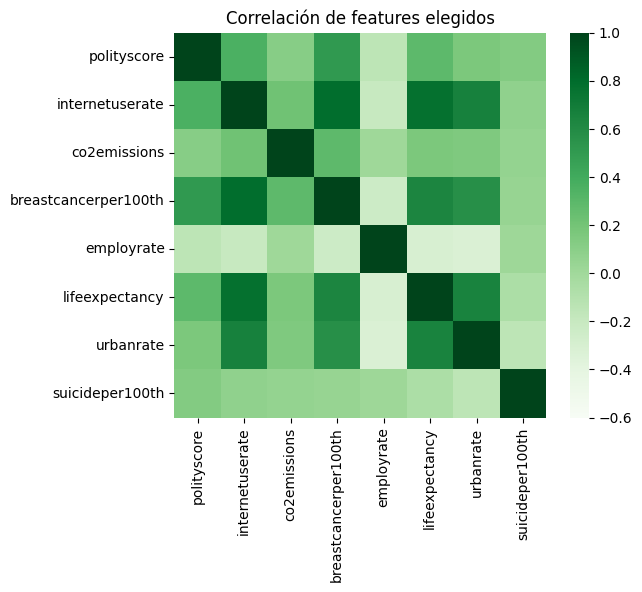

In [26]:
#Realizamos de nuevo la matriz de correlación pero ya depurada y solo con los fetures de entrenamiento y demas
plt.figure(figsize=(6, 5))
sns.heatmap(
    countries[featuresModel].corr(),
    vmin=-0.6, vmax=1,
    cmap="Greens"
)
plt.title("Correlación de features elegidos")

In [27]:
 countries[featuresModel].corr()

,polityscore,internetuserate,co2emissions,breastcancerper100th,employrate,lifeexpectancy,urbanrate,suicideper100th
polityscore,1.000000,0.360971,0.116393,0.510966,-0.149022,0.293101,0.166196,0.136173
internetuserate,0.360971,1.000000,0.216852,0.790571,-0.199687,0.772903,0.667022,0.081034
co2emissions,0.116393,0.216852,1.000000,0.284341,0.008849,0.167545,0.151257,0.058188
breastcancerper100th,0.510966,0.790571,0.284341,1.000000,-0.232849,0.638523,0.571986,0.044104
employrate,-0.149022,-0.199687,0.008849,-0.232849,1.000000,-0.304033,-0.322227,0.016203
lifeexpectancy,0.293101,0.772903,0.167545,0.638523,-0.304033,1.000000,0.650418,-0.058556
urbanrate,0.166196,0.667022,0.151257,0.571986,-0.322227,0.650418,1.000000,-0.144752
suicideper100th,0.136173,0.081034,0.058188,0.044104,0.016203,-0.058556,-0.144752,1.000000


In [28]:
countries.shape[0]

166

En el siguiente indice se puede apreciar que la mayoria de paises se considera que tiene una politica estable, ya que su media es un valor positivo, la columna no muestra valores atipicos

<h2>Analisis Univaraido y de datos categoricos añadidos</h2>

In [29]:
countries["polityscore"].describe()

count    156.000000
mean       3.692308
std        6.283224
min      -10.000000
25%       -2.000000
50%        6.000000
75%        9.000000
max       10.000000
Name: polityscore, dtype: float64

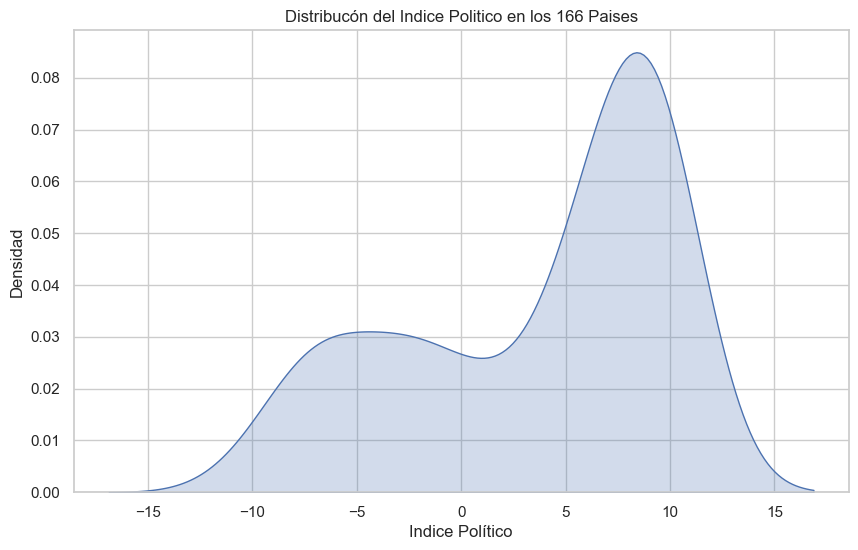

In [30]:
# Plotting a boxplot for number of reviews
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.kdeplot(data=countries["polityscore"], fill=True)  
plt.xlabel('Indice Político')  
plt.ylabel('Densidad') 
plt.title('Distribucón del Indice Politico en los '+str(countries.shape[0])+ " Paises")  
plt.show()

In [31]:
countries["urbanrate"].describe()

count    166.000000
mean      55.936506
std       22.844257
min       10.400000
25%       36.840000
50%       57.610000
75%       73.475000
max      100.000000
Name: urbanrate, dtype: float64

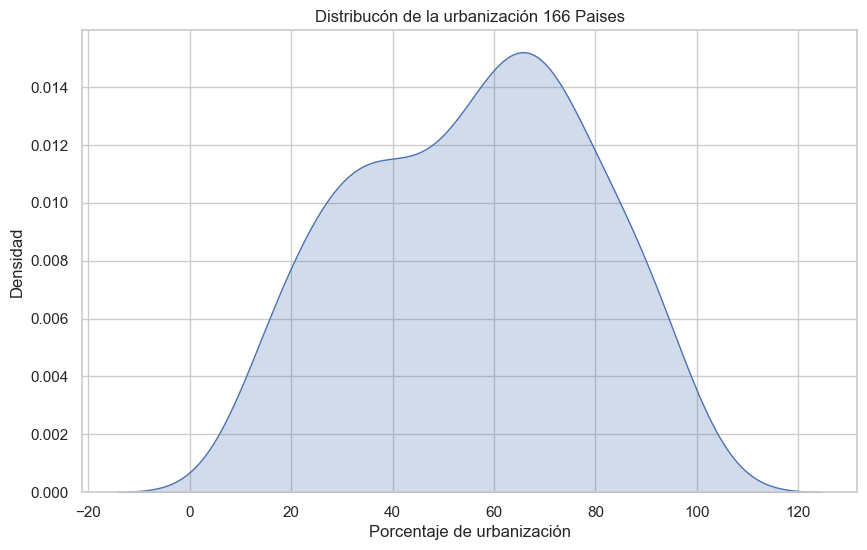

In [32]:
# Plotting a boxplot for number of reviews
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.kdeplot(data=countries["urbanrate"], fill=True)  
plt.xlabel('Porcentaje de urbanización')  
plt.ylabel('Densidad') 
plt.title('Distribucón de la urbanización '+str(countries.shape[0])+ " Paises")  
plt.show()

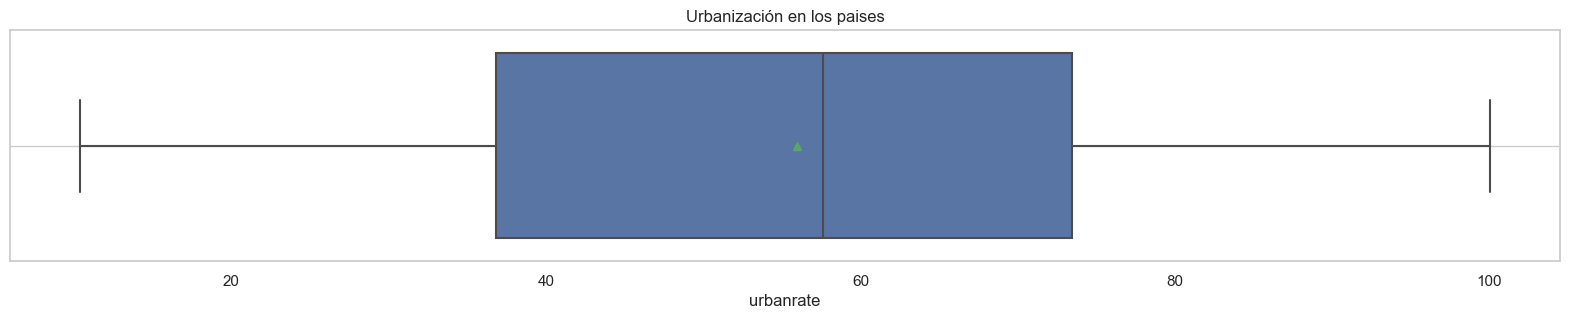

In [33]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=countries["urbanrate"], showmeans=True, orient="h")
plt.title("Urbanización en los paises")
plt.grid()
plt.show()

La gran mayoria de los paises estan altamente urbanizados, y la media de urbanización de los paises es del 55%

In [34]:
countries["lifeexpectancy"].describe()

count    166.000000
mean      69.103886
std        9.976511
min       47.794000
25%       62.467500
50%       72.974000
75%       76.127500
max       83.394000
Name: lifeexpectancy, dtype: float64

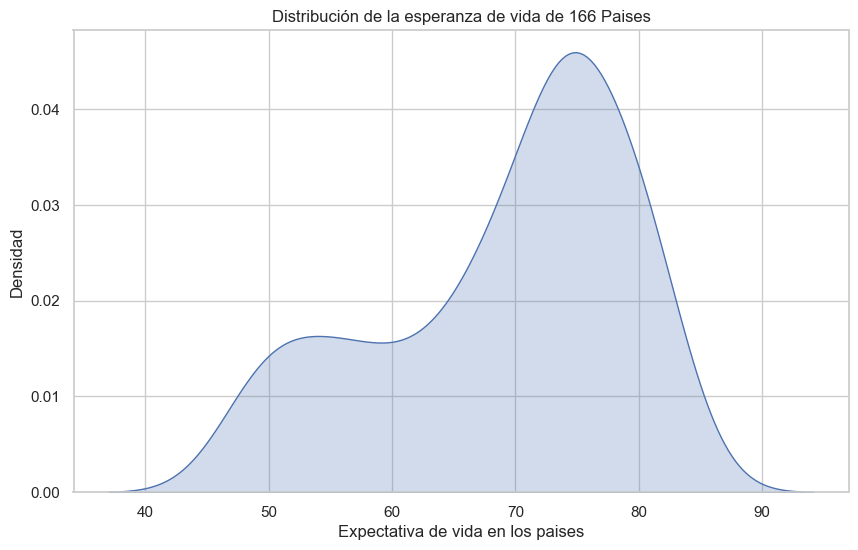

In [35]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6)) 
sns.kdeplot(data=countries["lifeexpectancy"], fill=True)  
plt.xlabel('Expectativa de vida en los paises')  
plt.ylabel('Densidad') 
plt.title('Distribución de la esperanza de vida de '+str(countries.shape[0])+ " Paises")  
plt.show()

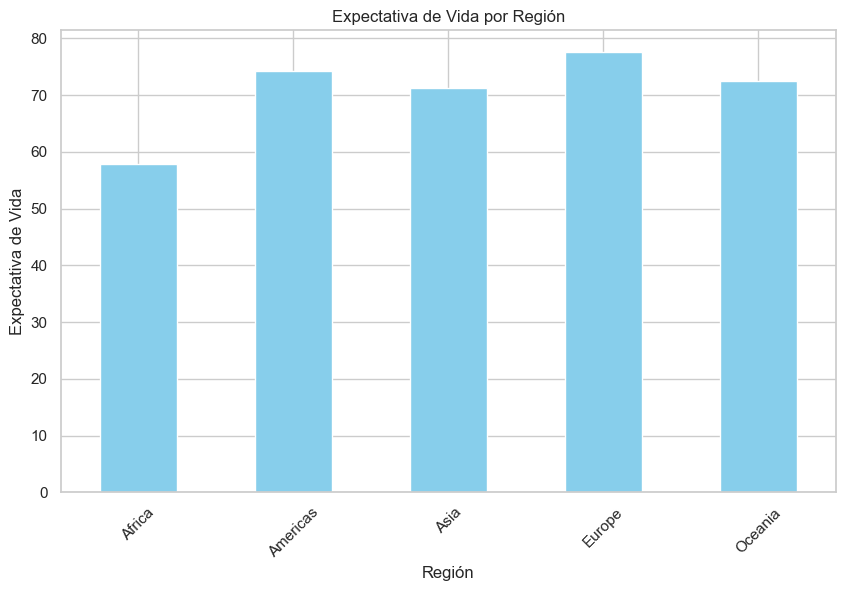

In [36]:
#expectativa de vida por paises, no se muestran valores atipicos relevantes en la miuestra
vida_por_region = countries.groupby('region')['lifeexpectancy'].mean()
plt.figure(figsize=(10, 6))
vida_por_region.plot(kind='bar', color='skyblue')
plt.title('Expectativa de Vida por Región')
plt.xlabel('Región')
plt.ylabel('Expectativa de Vida')
plt.xticks(rotation=45)
plt.show()

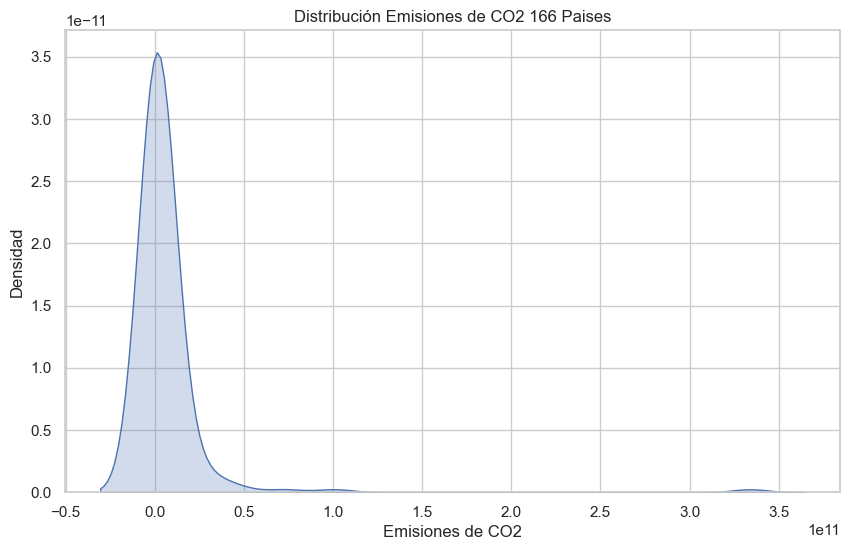

In [37]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6)) 
sns.kdeplot(data=countries["co2emissions"], fill=True)  
plt.xlabel('Emisiones de CO2')  
plt.ylabel('Densidad') 
plt.title('Distribución Emisiones de CO2 '+str(countries.shape[0])+ " Paises")  
plt.show()

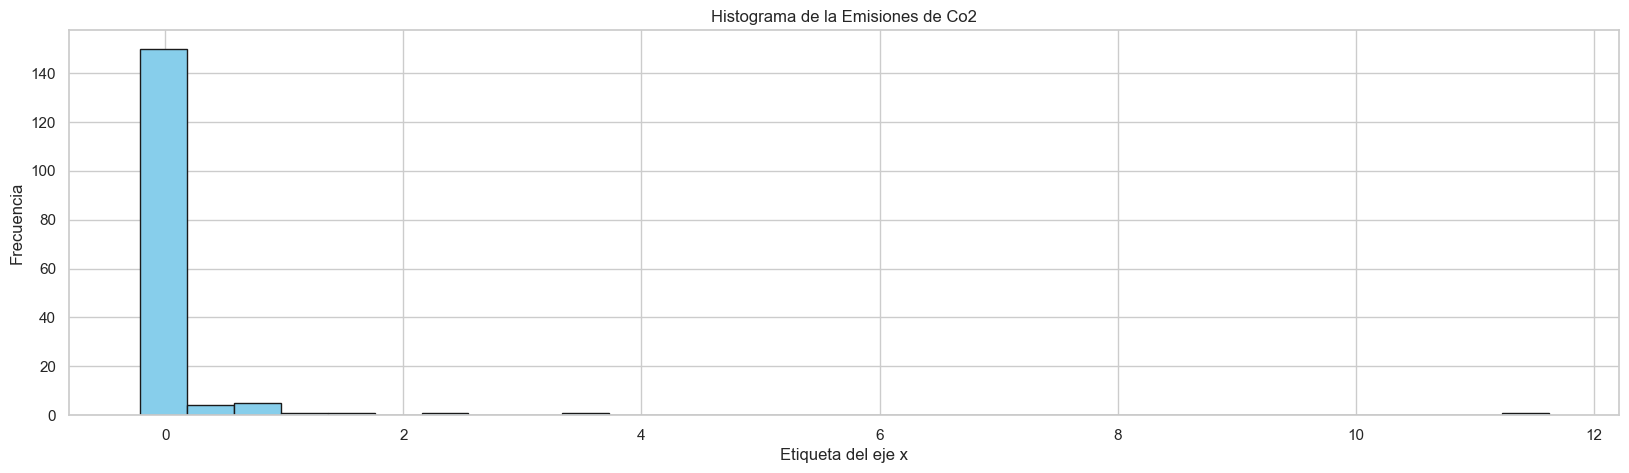

In [38]:
scaler = StandardScaler()
plt.figure(figsize=(20, 5))
plt.hist(scaler.fit_transform(countries[['co2emissions']]), bins=30, edgecolor='k', color='skyblue')
plt.xlabel('Etiqueta del eje x')  
plt.ylabel('Frecuencia') 
plt.title('Histograma de la Emisiones de Co2')
plt.show()

In [39]:
#existen valores atipicos en la muestra, se realiza la correcion con iqr para quitarlos y ver la garfica mejor
q1co2 = countries["co2emissions"].quantile(0.25)
q3co2 = countries["co2emissions"].quantile(0.75)
iqrco2 = q3co2 - q1co2
iqrco2

2313607083.0025

[]

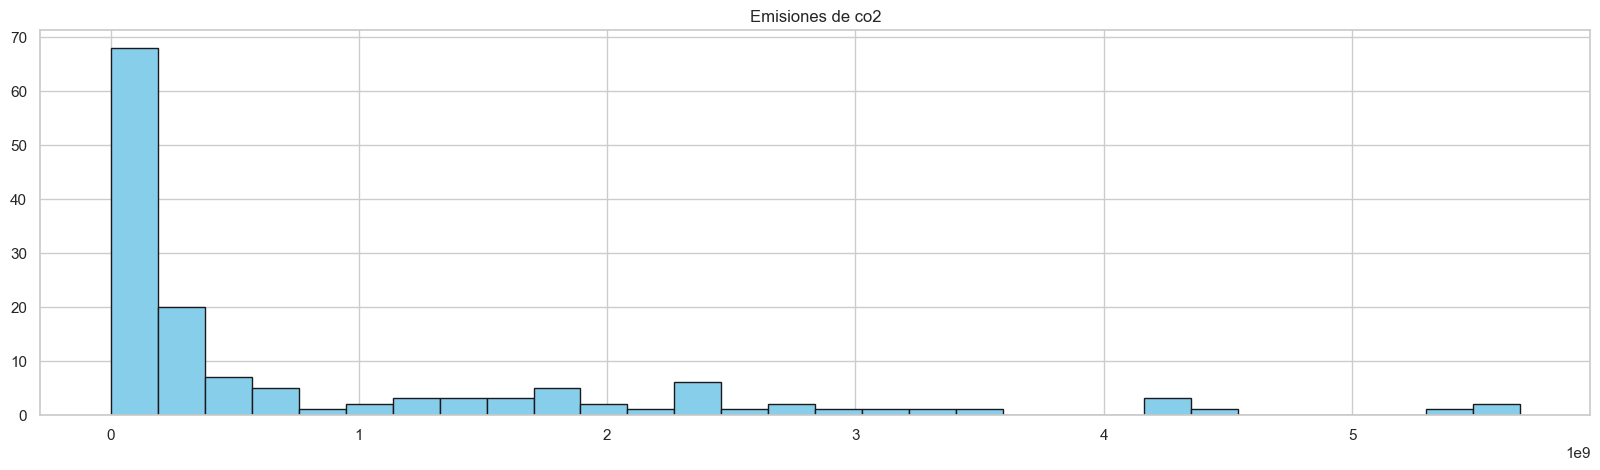

In [40]:
plt.figure(figsize=(20, 5))
plt.hist(countries.loc[countries["co2emissions"] <= (q3co2 + 1.5 * iqrco2)]["co2emissions"], bins=30, edgecolor='k', color='skyblue')
plt.title("Emisiones de co2")
plt.plot()

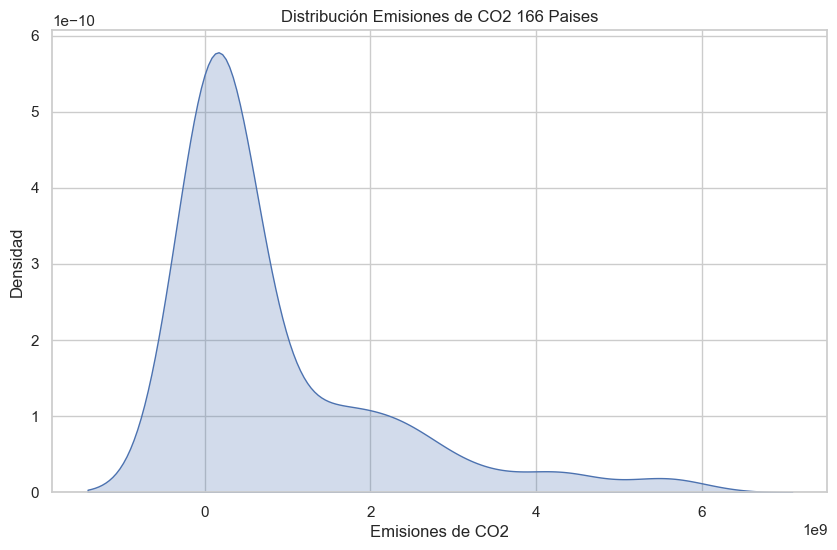

In [41]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6)) 
sns.kdeplot(data=countries.loc[countries["co2emissions"] <= (q3co2 + 1.5 * iqrco2)]["co2emissions"], fill=True)  
plt.xlabel('Emisiones de CO2')  
plt.ylabel('Densidad') 
plt.title('Distribución Emisiones de CO2 '+str(countries.shape[0])+ " Paises")  
plt.show()

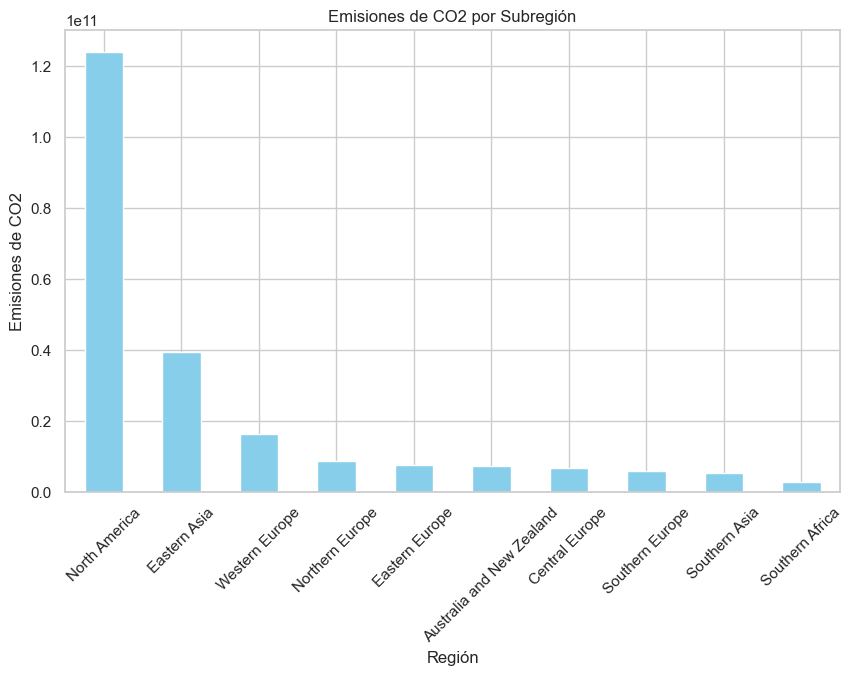

In [42]:
co2_for_subregions = countries.groupby('subregion')['co2emissions'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
co2_for_subregions.head(10).plot(kind='bar', color='skyblue')
plt.title('Emisiones de CO2 por Subregión')
plt.xlabel('Región')
plt.ylabel('Emisiones de CO2')
plt.xticks(rotation=45)
plt.show()

Para las  emisiones de los paises o sea el campo co2emissions habrá que usar una normalizacion de datos para evitar los valores atipicos de paises que producen mucho co2

In [43]:
countries["employrate"].describe()

count    165.000000
mean      59.189091
std       10.357376
min       34.900002
25%       52.099998
50%       58.900002
75%       65.000000
max       83.199997
Name: employrate, dtype: float64

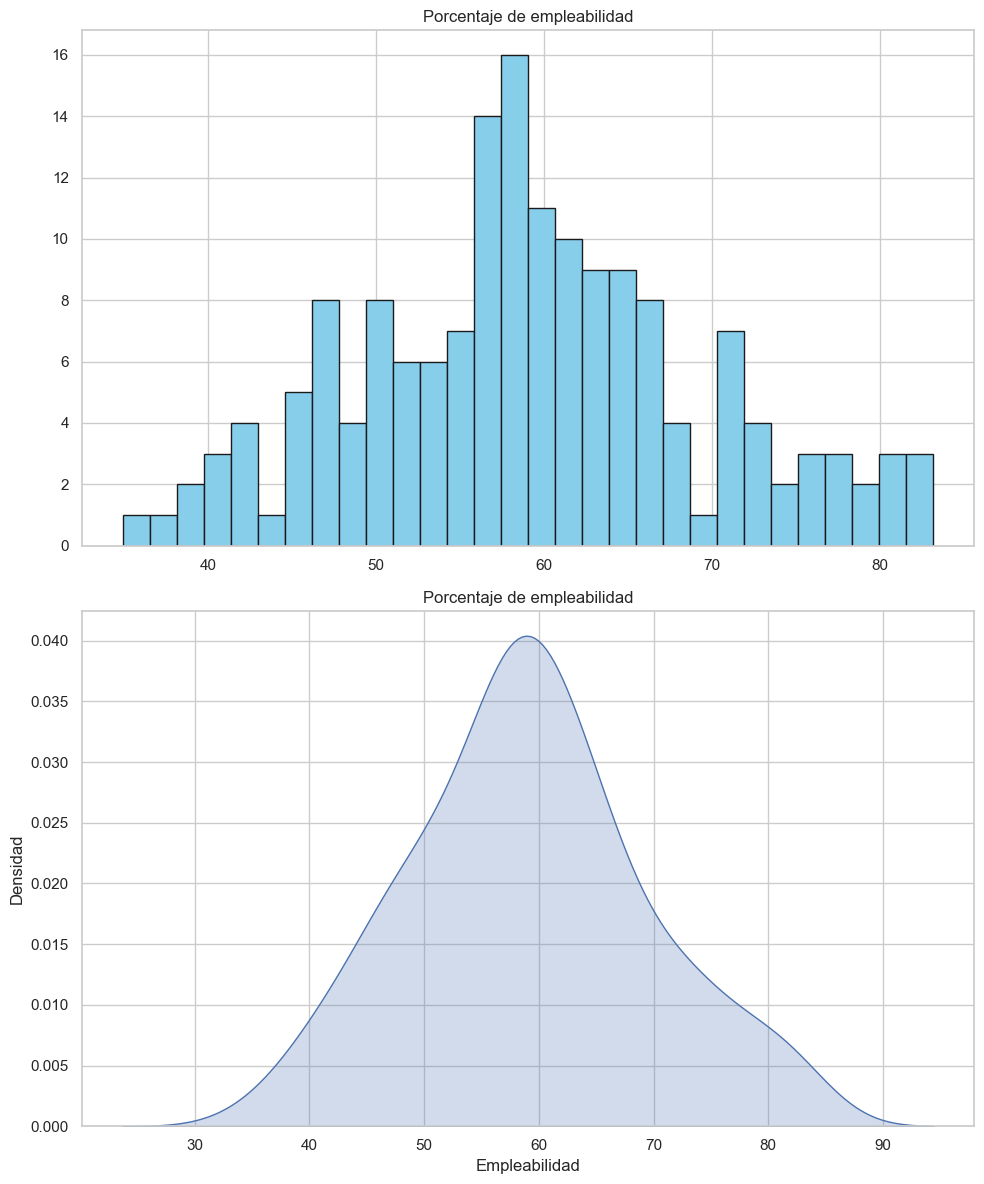

In [44]:
#Los garfcios muestran una distibucion normal 
Labels=["Porcentaje de empleabilidad","Empleabilidad"]

plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.hist(countries["employrate"], bins=30, edgecolor='k', color='skyblue')
plt.title(Labels[0])
plt.subplot(2, 1, 2)
sns.kdeplot(countries["employrate"], fill=True)  
plt.xlabel(Labels[1])  
plt.ylabel('Densidad') 
plt.title(Labels[0])  
plt.tight_layout()
plt.show()

In [45]:
countries["breastcancerper100th"].describe()

count    165.000000
mean      37.449697
std       23.035581
min        3.900000
25%       20.600000
50%       29.800000
75%       50.100000
max      101.100000
Name: breastcancerper100th, dtype: float64

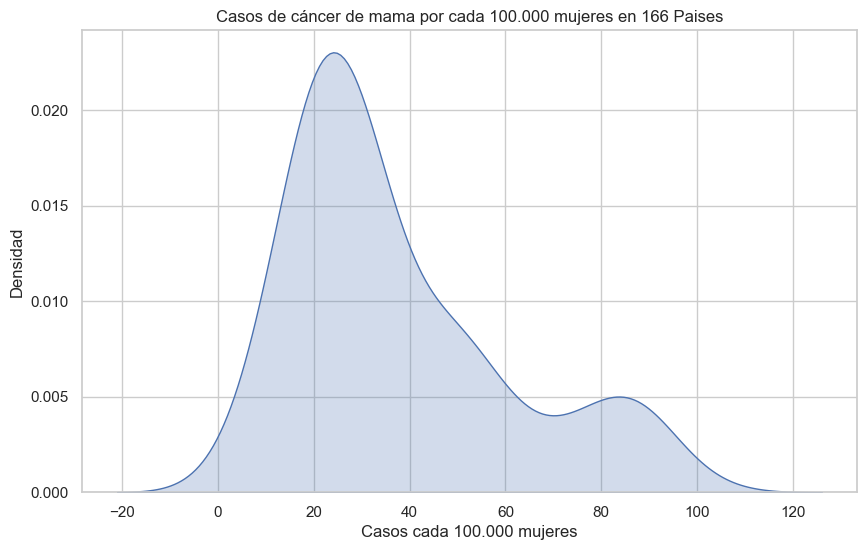

In [46]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6)) 
sns.kdeplot(data=countries["breastcancerper100th"], fill=True)  
plt.xlabel('Casos cada 100.000 mujeres')  
plt.ylabel('Densidad') 
plt.title('Casos de cáncer de mama por cada 100.000 mujeres en '+str(countries.shape[0])+ " Paises")  
plt.show()

<h2>Analisis bivariado:</h2>
Para este enfoque se decide realizar y revisar los diferentes graficos entre las categorias de salud, economia y empleo

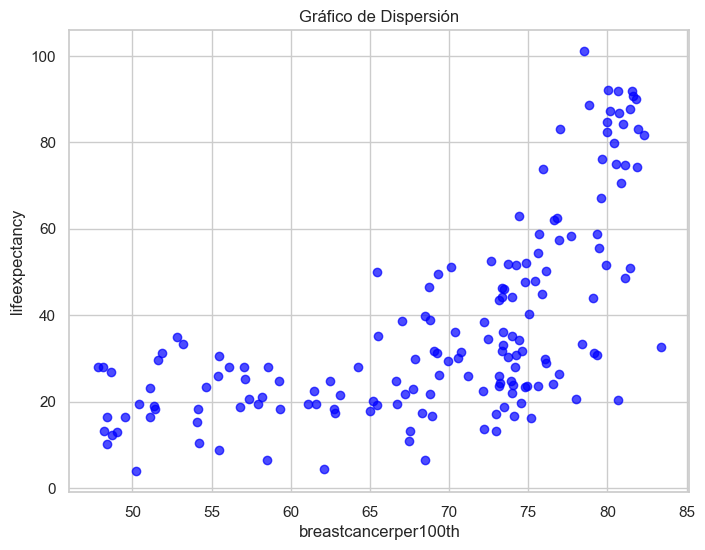

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(countries["lifeexpectancy"], countries["breastcancerper100th"], color='blue', alpha=0.7 )  # alpha controla la opacidad de los puntos
plt.title('Gráfico de Dispersión')
plt.xlabel('breastcancerper100th')
plt.ylabel('lifeexpectancy')
plt.grid(True)

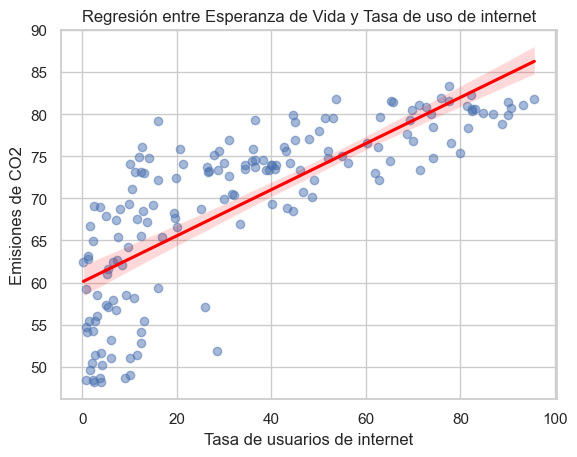

In [48]:
sns.regplot(x='internetuserate', y='lifeexpectancy', data=countries, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Tasa de usuarios de internet')
plt.ylabel('Emisiones de CO2')
plt.title('Regresión entre Esperanza de Vida y Tasa de uso de internet')
plt.show()

El anterior análisis nos muestra que a medida que avanza la esperanza de vida el ratio del uso del internet aumenta, es debido a que en países desarrollados el uso del internet es mayor

# Tratamiento de valores atipicos en features

Para la variable co2emissions es necesario realizar un procesamiento ya que tiene valores atipicos que son peligrosos para el entraniento 

In [49]:
#Usaremos winsorizing para quitar valores muy altos en esta distrubucion 
porcentaje = 0.1  # Por ejemplo, para recortar el 10% de los valores más altos
countries['co2emissions'] = winsorize(countries['co2emissions'], limits=(None, porcentaje))

# Particionamiento de los datos 

Distribuimos los datos que generaran el modelo y luego miraran su precisión en una proporción de 70 a 30

## Imputacion de datos faltantes 

Para esto usaremos la mediana de la region en la cual se encuentra el pais es decir Colomabia: Sur America, y se imputará la media e esta region

In [50]:
#usamos estos features solo para imputar los valores faltantes luego vamos a eliminarlos, al entrenar el modelo
clavesCategoricas=['region', 'subregion','country']
featuresModel.extend(clavesCategoricas)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(countries[featuresModel], countries["incomeperperson"], test_size=0.3, random_state=1)

In [52]:
X_train.shape, y_train.shape

((116, 11), (116,))

In [53]:
X_test.shape, y_test.shape

((50, 11), (50,))

### Data set de Train

Primero analizamos que datos necesitamos extraer la mediana por región para luego imputarlos en el dataset de Train

In [54]:
# Mostrar porcentaje de valores nulos en columnas
percentage_result = X_train.isnull().sum()/X_train.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "NullsPercentage": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result= percentage_result.sort_values(by='NullsPercentage', ascending=False)
percentage_result

,columns,NullsPercentage
0,polityscore,5.172414
1,internetuserate,1.724138
3,breastcancerper100th,0.862069
4,employrate,0.862069
2,co2emissions,0.000000
5,lifeexpectancy,0.000000
6,urbanrate,0.000000
7,suicideper100th,0.000000
8,region,0.000000
9,subregion,0.000000


In [55]:
X_train[X_train['polityscore'].isnull()]

,polityscore,internetuserate,co2emissions,breastcancerper100th,employrate,lifeexpectancy,urbanrate,suicideper100th,region,subregion,country
40,NaN,31.568098,8.631700e+07,30.0,44.700001,70.563,74.92,20.747431,Americas,South America,Suriname
69,NaN,63.077993,7.378433e+07,76.1,46.799999,79.634,94.26,4.551121,Europe,Southern Europe,Malta
133,NaN,49.989975,2.542063e+08,20.6,63.799999,78.005,74.82,1.370002,Asia,South-Eastern Asia,Brunei
79,NaN,42.984580,1.375550e+08,54.4,66.599998,75.620,83.70,3.374416,Americas,Caribbean,Bahamas
3,NaN,70.028599,3.616067e+07,62.5,66.900002,76.835,39.84,3.108603,Americas,Caribbean,Barbados
135,NaN,52.002061,2.364193e+08,58.9,41.200001,75.670,47.44,11.836716,Europe,Southeast Europe,Bosnia and Herzegovina


In [56]:
#sacamos la media del polity score por region
#Creamos un Dataframe Para almacenar estos datos de imputación 
means=pd.DataFrame()
meanRegionPolity = countries.groupby('subregion')['polityscore'].mean().sort_values(ascending=False)
means["polityscore-mean"]=meanRegionPolity
means
meanRegionPolity

subregion
Australia and New Zealand    10.000000
Southern Europe              10.000000
Northern Europe               9.666667
Central Europe                9.600000
Western Europe                9.400000
North America                 9.333333
Southeast Europe              9.000000
Central America               8.500000
South America                 6.818182
Eastern Asia                  5.250000
Caribbean                     5.000000
Southern Africa               4.714286
Southern Asia                 3.375000
Eastern Europe                3.000000
Eastern Africa                2.928571
Melanesia                     2.666667
Western Africa                2.466667
South-Eastern Asia            1.300000
Middle Africa                -1.250000
Western Asia                 -2.125000
Northern Africa              -3.666667
Central Asia                 -5.200000
Name: polityscore, dtype: float64

In [57]:
#imputamos los valores faltantes de este feature
for index, row in X_train.iterrows():
    if pd.isna(row["polityscore"]):
        X_train.at[index, 'polityscore'] =math.floor(meanRegionPolity[row["subregion"]])

Realizamos el mismo proceso para los features:
<ul>
<li>internetuserate</li>
<li>co2emissions</li>
<li>breastcancerper100th</li>
<li>employrate</li>
</ul>

In [58]:
claveswithnulls=['internetuserate','co2emissions','breastcancerper100th','employrate']

In [59]:
#aca me aseguro que las claves todas puedan recibir valores flotantes y lo asigno
for clave in claveswithnulls:
    calevData=clave+'-mean'
    meaunKey= countries.groupby('subregion')[clave].mean().sort_values(ascending=False)
    means[calevData]=meaunKey
    for index, row in X_train.iterrows():
        if pd.isna(row[clave]):
            X_train.at[index, clave] =meaunKey[row["subregion"]]

In [60]:
# Mostrar porcentaje de valores nulos en columnas
percentage_result = X_train.isnull().sum()/X_train.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "NullsPercentage": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result= percentage_result.sort_values(by='NullsPercentage', ascending=False)
percentage_result

,columns,NullsPercentage
0,polityscore,0.0
1,internetuserate,0.0
2,co2emissions,0.0
3,breastcancerper100th,0.0
4,employrate,0.0
5,lifeexpectancy,0.0
6,urbanrate,0.0
7,suicideper100th,0.0
8,region,0.0
9,subregion,0.0


### Dataset Test
Realizamos el mismo proceso con el dataset de test

In [61]:
# Mostrar porcentaje nulos Test
percentage_result = X_test.isnull().sum()/X_test.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "NullsPercentage": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result= percentage_result.sort_values(by='NullsPercentage', ascending=False)
percentage_result

,columns,NullsPercentage
0,polityscore,8.0
1,internetuserate,2.0
2,co2emissions,0.0
3,breastcancerper100th,0.0
4,employrate,0.0
5,lifeexpectancy,0.0
6,urbanrate,0.0
7,suicideper100th,0.0
8,region,0.0
9,subregion,0.0


In [62]:
#aca me aseguro que las claves todas puedan recibir valores flotantes y lo asigno
clavesnullsTest= ["polityscore","internetuserate","co2emissions"]
meanTest= pd.DataFrame()
for clave in clavesnullsTest:
    calevData=clave+'-mean'
    meaunKey= countries.groupby('subregion')[clave].mean().sort_values(ascending=False)
    meanTest[calevData]=meaunKey
    for index, row in X_test.iterrows():
        if pd.isna(row[clave]):
            X_test.at[index, clave] =meaunKey[row["subregion"]]

In [63]:
# Mostrar porcentaje nulos Test despues del proceso
percentage_result = X_test.isnull().sum()/X_test.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "NullsPercentage": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result= percentage_result.sort_values(by='NullsPercentage', ascending=False)
percentage_result

,columns,NullsPercentage
0,polityscore,0.0
1,internetuserate,0.0
2,co2emissions,0.0
3,breastcancerper100th,0.0
4,employrate,0.0
5,lifeexpectancy,0.0
6,urbanrate,0.0
7,suicideper100th,0.0
8,region,0.0
9,subregion,0.0


In [64]:
X_test.drop(clavesCategoricas, axis=1, inplace=True)
X_train.drop(clavesCategoricas, axis=1, inplace=True)

In [65]:
#Mostramos de nuevo luego del proceso de imputacion:
X_train.shape, y_train.shape

((116, 8), (116,))

In [66]:
X_test.shape, y_test.shape

((50, 8), (50,))

In [67]:
featuresModel= [x for x in featuresModel if x not in clavesCategoricas]

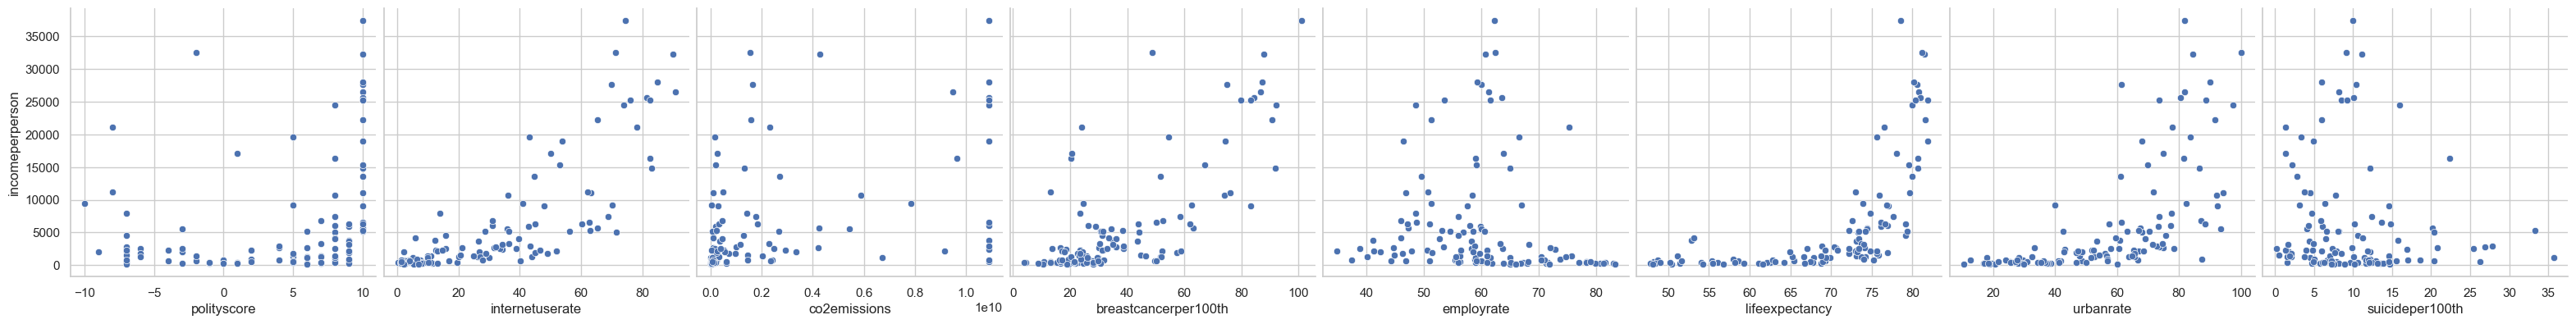

In [68]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=featuresModel, kind="scatter")

In [69]:
regression = LinearRegression()

In [70]:
regression.fit(X_train, y_train)

LinearRegression()

In [71]:
coefficients_df = pd.concat([
    pd.Series(featuresModel),
    pd.Series(regression.coef_)
], axis=1).rename(columns={0: "feature", 1: "value"})
coefficients_df

,feature,value
0,polityscore,-8.325260e+01
1,internetuserate,1.401954e+02
2,co2emissions,4.355513e-07
3,breastcancerper100th,1.399677e+02
4,employrate,1.965145e+02
5,lifeexpectancy,-2.063429e+01
6,urbanrate,6.544812e+01
7,suicideper100th,-1.376808e+02


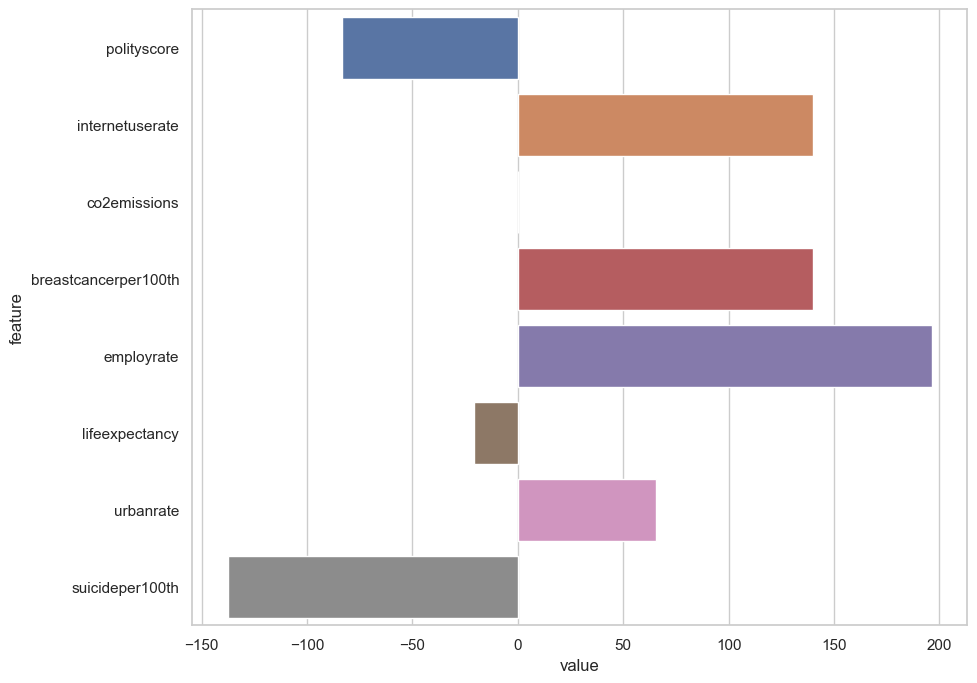

In [72]:
plt.figure(figsize=(10, 8))
sns.barplot(
    y=coefficients_df["feature"],
    x=coefficients_df["value"],
    orient="h"
)
plt.show()

In [73]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 3100.9511047024666
Test: 5480.716167833172


In [74]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 4057.30229645657
Test: 8494.959730305021


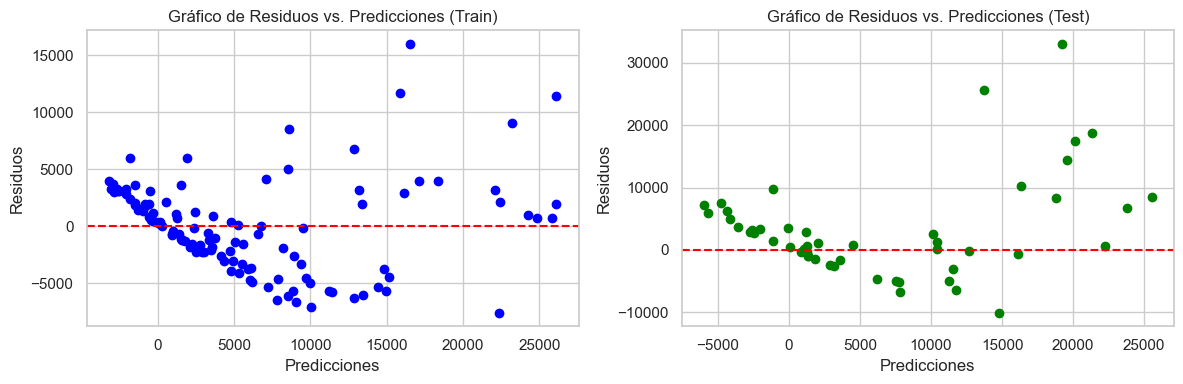

In [75]:
residuos_train = y_train - regression.predict(X_train)
residuos_test = y_test - regression.predict(X_test)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(regression.predict(X_train), residuos_train, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Predicciones (Train)')

plt.subplot(1, 2, 2)
plt.scatter(regression.predict(X_test), residuos_test, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Predicciones (Test)')

plt.tight_layout()
plt.show()

In [76]:
featuresFilter = ["internetuserate", "breastcancerper100th", "employrate","urbanrate",'suicideper100th']

In [77]:
X_train[featuresFilter].corr()

,internetuserate,breastcancerper100th,employrate,urbanrate,suicideper100th
internetuserate,1.000000,0.755930,-0.309987,0.685410,0.027226
breastcancerper100th,0.755930,1.000000,-0.343042,0.592050,-0.026090
employrate,-0.309987,-0.343042,1.000000,-0.446041,0.024658
urbanrate,0.685410,0.592050,-0.446041,1.000000,-0.112910
suicideper100th,0.027226,-0.026090,0.024658,-0.112910,1.000000


Intentamos con un segundo modelo a partir de las features mas relevantes para el modelo 

In [78]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [79]:
pipeline.fit(X_train[featuresFilter], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [80]:
pipeline["model"].intercept_

6016.0761186827585

In [81]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[featuresFilter])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[featuresFilter])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[featuresFilter]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[featuresFilter]))))

MAE:
Train: 3406.857181214679
Test: 5374.530198977187

RMSE:
Train: 4327.196267564079
Test: 8213.010193988786


Logramos reducir un poco el error al usar la regularizació  y eliminar features poco vitales

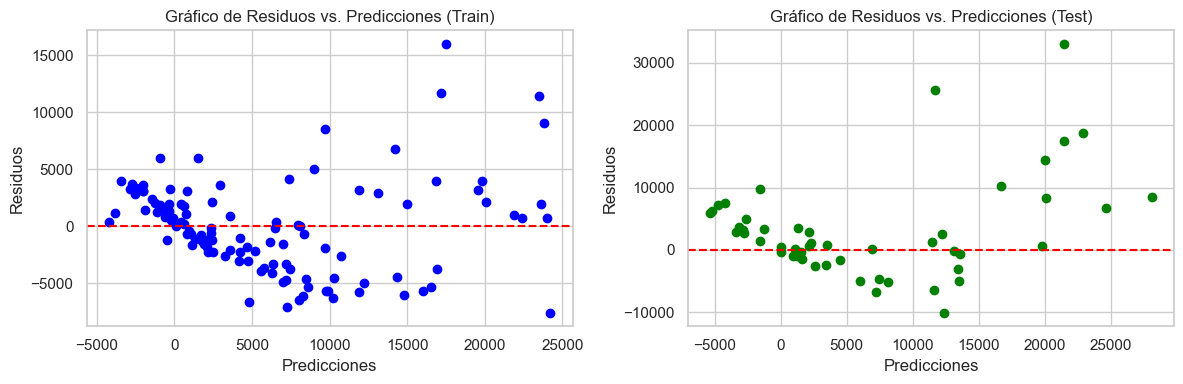

In [82]:
residuos_train = y_train - regression.predict(X_train)
residuos_test = y_test - regression.predict(X_test)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(pipeline.predict(X_train[featuresFilter]), residuos_train, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Predicciones (Train)')

plt.subplot(1, 2, 2)
plt.scatter(pipeline.predict(X_test[featuresFilter]), residuos_test, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Predicciones (Test)')

plt.tight_layout()
plt.show()

In [83]:
pipelineLaso = Pipeline([
    ("scaler", StandardScaler()),  # Escalador para estandarizar las características
    ("model", Lasso(alpha=1))   # Lasso con alpha=1.0 (puedes ajustar este hiperparámetro)
])

In [84]:
pipelineLaso.fit(X_train[featuresFilter], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=1))])

In [85]:
pd.DataFrame({"columns": featuresFilter, "coef": pipeline["model"].coef_})

,columns,coef
0,internetuserate,3901.927352
1,breastcancerper100th,3041.017800
2,employrate,2127.682255
3,urbanrate,1765.369307
4,suicideper100th,-696.570284


In [86]:
print("MAE:")
print("Train with Lasso:", mean_absolute_error(y_train, pipelineLaso.predict(X_train[featuresFilter])))
print("Test:", mean_absolute_error(y_test, pipelineLaso.predict(X_test[featuresFilter])))
print("\nRMSE with Lasso:")
print("Train with Lasso:", np.sqrt(mean_squared_error(y_train, pipelineLaso.predict(X_train[featuresFilter]))))
print("Test with Lasso:", np.sqrt(mean_squared_error(y_test, pipelineLaso.predict(X_test[featuresFilter]))))

MAE:
Train with Lasso: 3406.588080207897
Test: 5373.933729673548

RMSE with Lasso:
Train with Lasso: 4327.196835477892
Test with Lasso: 8213.171805471708


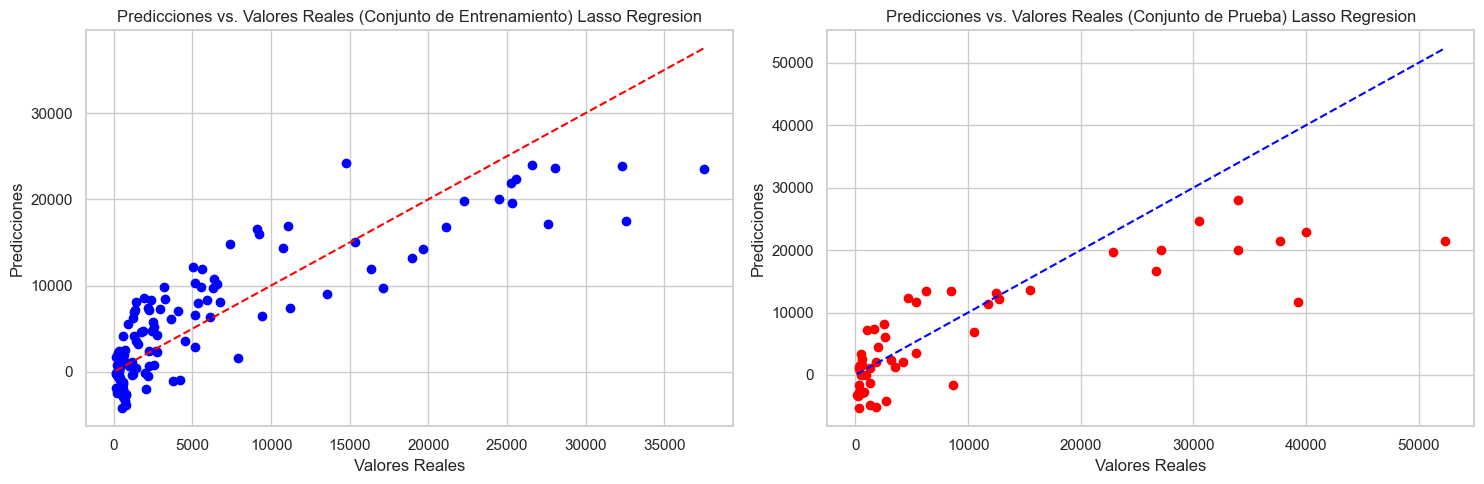

In [87]:
# Gráfico de dispersión para el conjunto de entrenamiento
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, pipelineLaso.predict(X_train[featuresFilter]), color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Conjunto de Entrenamiento) Lasso Regresion')

# Gráfico de dispersión para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, pipelineLaso.predict(X_test[featuresFilter]), color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Conjunto de Prueba) Lasso Regresion')

# Ajustar la distribución
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Con el modelo Lasso vemos un aumento del error, pero los errores tienden a ser normales y no  tan bajos 

In [88]:
grado_polinomio = 2 # Puedes ajustar el grado del polinomio según sea necesario
poly_features = PolynomialFeatures(degree=grado_polinomio)
X_poly = poly_features.fit_transform(X_train[featuresFilter])

In [89]:
regression_poly = make_pipeline(PolynomialFeatures(degree=grado_polinomio), LinearRegression())
regression_poly.fit(X_train[featuresFilter], y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [90]:
print(f"MAE Polinomical regresion {grado_polinomio}  :")
print("Train:", mean_absolute_error(y_train, regression_poly.predict(X_train[featuresFilter])))
print("Test:", mean_absolute_error(y_test, regression_poly.predict(X_test[featuresFilter])))
print(f"\nRMSE regresion {grado_polinomio} :")
print("Train:", np.sqrt(mean_squared_error(y_train, regression_poly.predict(X_train[featuresFilter]))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression_poly.predict(X_test[featuresFilter]))))

MAE Polinomical regresion 2  :
Train: 2011.59631470471
Test: 4067.2067716871247

RMSE regresion 2 :
Train: 3137.2737996794995
Test: 7638.176372865033


<p style='color:red'>No existe una mejoría en el error con esta tenica del modelo <br>  Intentaremos con un modelo loratimico  </p>

In [91]:
y_trainlog = np.log(y_train)
y_testlog=np.log(y_test)

In [92]:
regression_log = LinearRegression()
regression_log.fit(X_train[featuresFilter], y_trainlog)

LinearRegression()

In [93]:
print(f"MAE Logaritmical regresion:")
print("Train:", mean_absolute_error(y_trainlog, regression_log.predict(X_train[featuresFilter])))
print("Test:", mean_absolute_error(y_testlog, regression_log.predict(X_test[featuresFilter])))
print(f"\nRMSE Logaritmical regresion :")
print("Train:", np.sqrt(mean_squared_error(y_trainlog, regression_log.predict(X_train[featuresFilter]))))
print("Test:", np.sqrt(mean_squared_error(y_testlog, regression_log.predict(X_test[featuresFilter]))))

MAE Logaritmical regresion:
Train: 0.4923244037790903
Test: 0.6563494855329504

RMSE Logaritmical regresion :
Train: 0.6205878876608324
Test: 0.8591474033107979


Luego de entrenar el modelo y lograr el menor erro posible validaremos los supuestos, de manera logaritmica para conservar la escala

# Validación de supuestos

## Colinealidad

<AxesSubplot: >

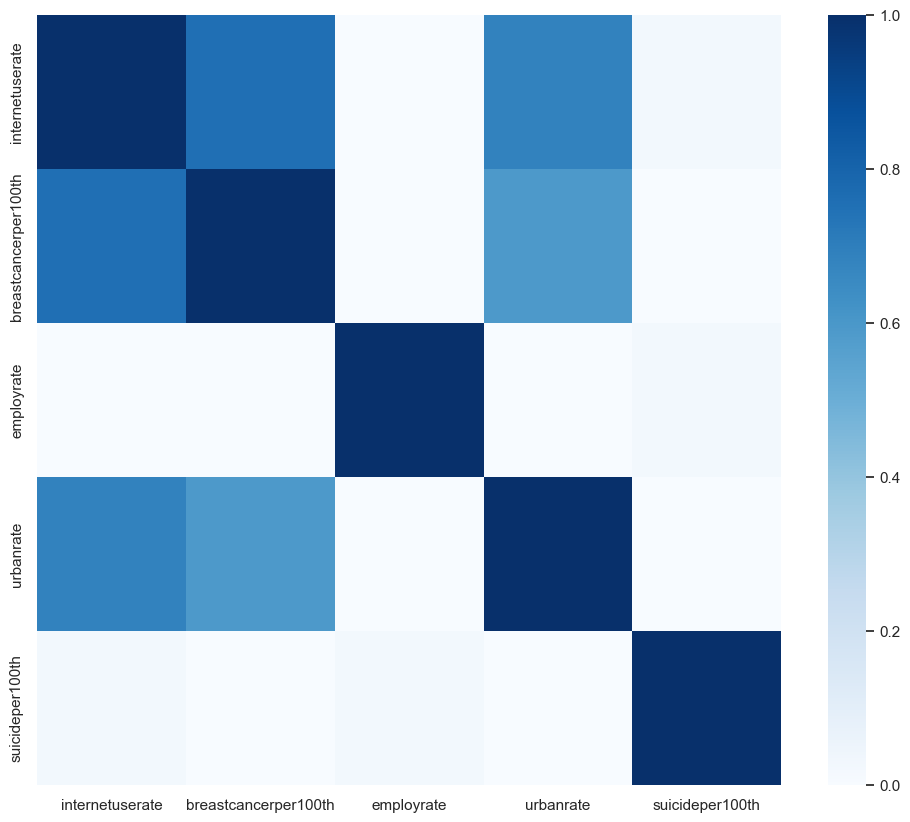

In [94]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train[featuresFilter].corr(), cmap="Blues", vmin=0, vmax=1)

In [95]:
X_train[featuresFilter].corr()

,internetuserate,breastcancerper100th,employrate,urbanrate,suicideper100th
internetuserate,1.000000,0.755930,-0.309987,0.685410,0.027226
breastcancerper100th,0.755930,1.000000,-0.343042,0.592050,-0.026090
employrate,-0.309987,-0.343042,1.000000,-0.446041,0.024658
urbanrate,0.685410,0.592050,-0.446041,1.000000,-0.112910
suicideper100th,0.027226,-0.026090,0.024658,-0.112910,1.000000


In [96]:
#Se nota baja correlación en los features del modelo 

## Linealidad

In [97]:
def plot_scatter_and_fit(X, y, feature_name):
    plt.scatter(X, y, alpha=0.5, label='Datos', c='skyblue')
    plt.xlabel(feature_name)
    plt.ylabel('Log(incomeperperson)')
    plt.title(f'Relación entre {feature_name} y Log(incomeperperson)')

    coef = np.polyfit(X, y, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(X, poly1d_fn(X), 'r-', label='Regresión')
    
    plt.legend()
    plt.show()

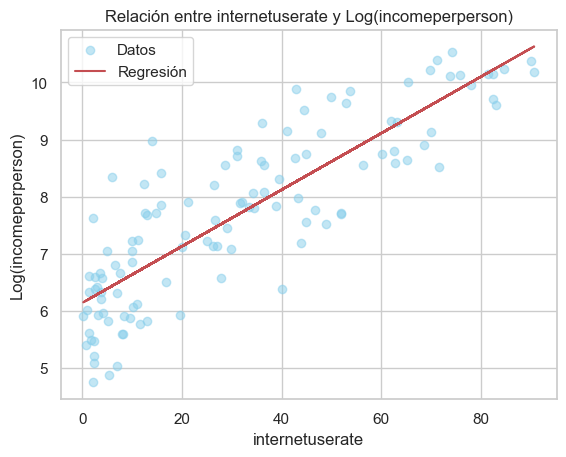

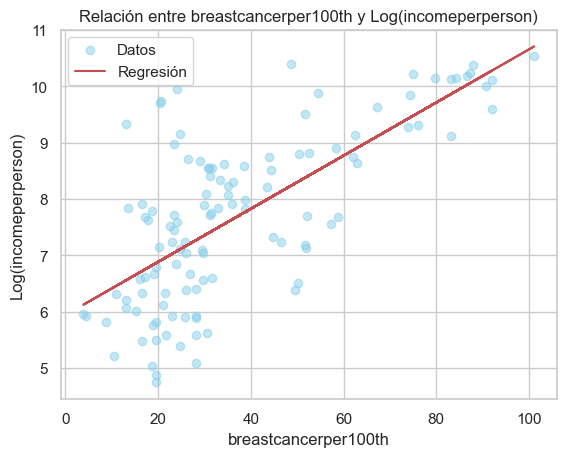

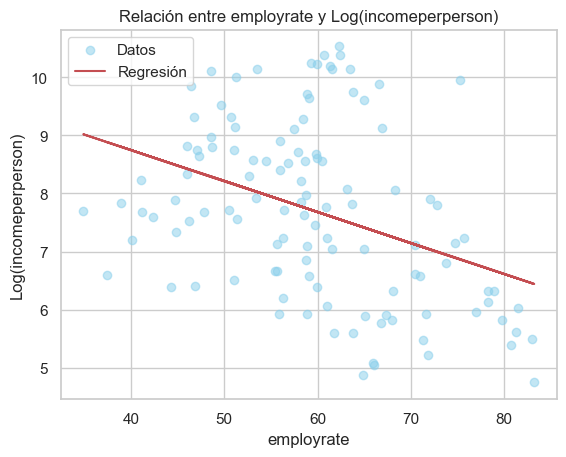

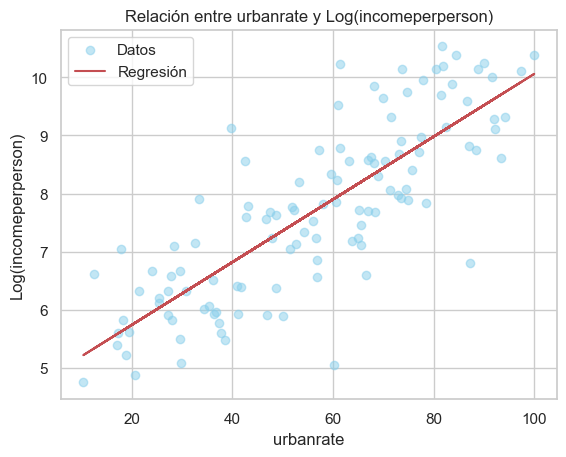

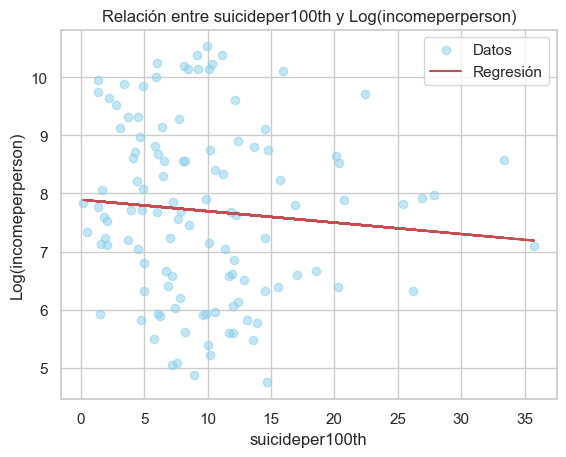

In [98]:
for feature in featuresFilter:
    plot_scatter_and_fit(X_train[feature], y_trainlog, feature)

In [99]:
errors = (regression_log.predict(X_train[featuresFilter])-y_trainlog).values

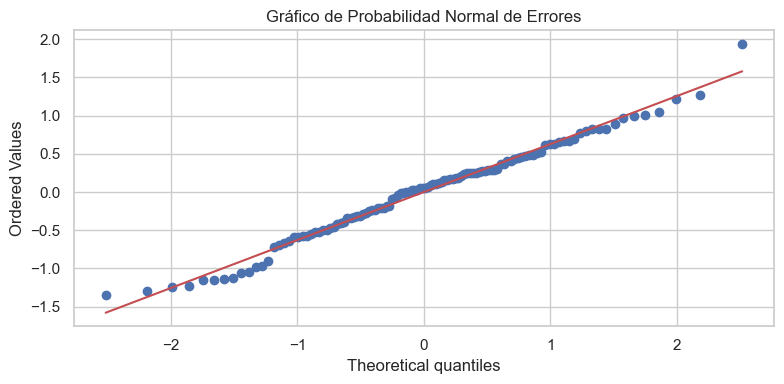

In [100]:
fig, ax = plt.subplots(figsize=(8, 4))
_ = stats.probplot(errors, dist="norm", plot=ax)
ax.set_title('Gráfico de Probabilidad Normal de Errores')
plt.tight_layout()
plt.show()

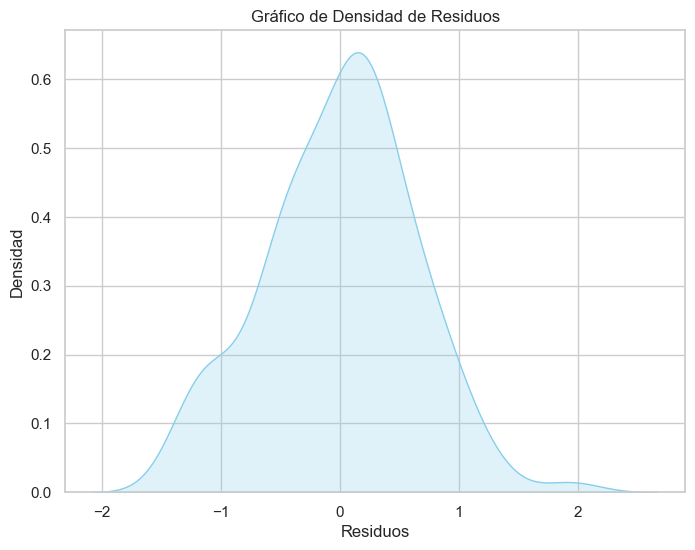

In [101]:
plt.figure(figsize=(8, 6))
sns.kdeplot(errors, color='skyblue', fill=True)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Residuos')
plt.show()

Los analisis muestran una normalidad en los residuos o errores del modleo lo que se puede llamar casi una distribuacion normal cumpliendo el supuesto

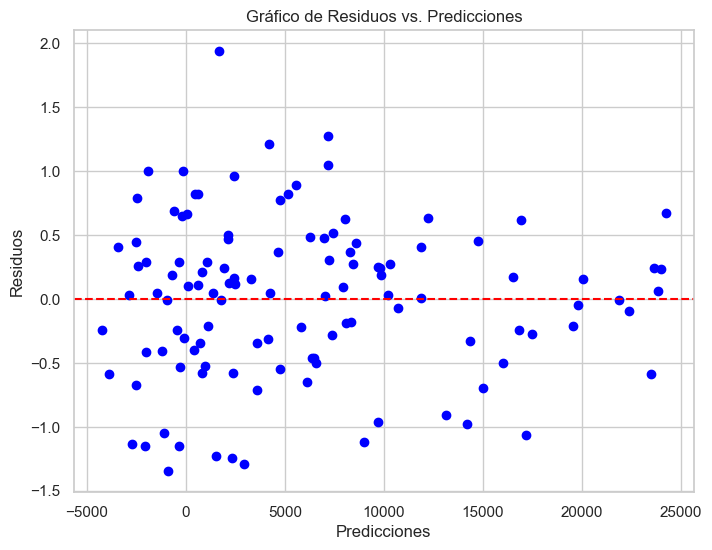

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(pipeline.predict(X_train[featuresFilter]), errors, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Predicciones')
plt.show()

Existe Heterosticidad en el modelo, se debe a la poca informaicon y las pocas variables de esto

# Concluiones:

Cada modelo mostro sus cualidades, sin embargo notamos una gran mejora al generar modelos con transformacion logaritmica; los polinomicos no mostraron mejora significativa. esto muestra que las variables se acoplan mejor a la funcion logaritmica.

para la solución se podrian ver otros tipos de modelos diferentes para determinar mejor este contexto ya que el modelo puede tener un error bastante alto

En el Git se encuntra la presentación que va junto a este Taller, titulada: Mejoras PIB Pais